In [1]:
from analysis.project_functions import *
process_and_save_data("../data/raw/matches.json")

c:\users\keyvan\desktop\ubc\cosc 301\course-project-solo_108\venv\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [1]:
from analysis.project_functions import *
matches_df, players_df, pair_players_df = load_processed_data()
print(matches_df)
print(players_df)
print(pair_players_df)

       duration  first_blood_time  dire_kills  radiant_kills  radiant_win
0          1597               181        20.0           47.0         True
1          1965               217        32.0           32.0        False
2          1945                 0        53.0           28.0        False
3          1476                 0        11.0           41.0         True
4          1411                 0        12.0           35.0         True
...         ...               ...         ...            ...          ...
32031      2101               229        20.0           54.0         True
32032      3060               197        55.0           41.0        False
32033      2333                36        51.0           36.0        False
32034      3053                73        43.0           54.0         True
32035      1465                31        18.0           30.0         True

[32036 rows x 5 columns]
        hero_id  assists  kills  deaths  gpm  xpm    win
0            54       12     

## Players in teams
To address the issue I created a new dataframe which includes the winrate
of 2 heroes when they play together. Here is a heatmap for the heroes
that have the best winrates together.

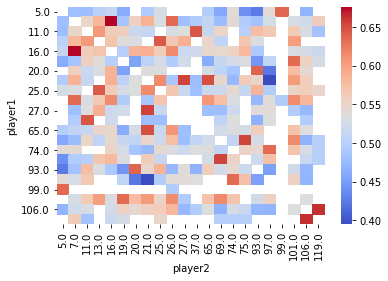

In [2]:
plot = player_synergy_heatmap(pair_players_df)


## Improved answer to the research question

To find the best team this time I tried to find the 5 heroes where their paired
winrate is maximized meaning the sum of their winrates (10 pairs for each team)
is maximized. The normal brute force algorithm was too slow as there are C(117, 5)
combinations which is roughly 10<sup>8</sup>.

We can reduce this problem in graph theory to find the sub graph of size k
which has the maximum edge weight sum. As this problem is NP we can't find
the best solution so I came up with an approx algorithm from the following algorithms.

* [Kruskal's algorithm](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm)
* [Minimum spanning tree](https://en.wikipedia.org/wiki/Minimum_spanning_tree)
* [Disjoint-set data structure](https://en.wikipedia.org/wiki/Disjoint-set_data_structure)
* [Depth-first search](https://en.wikipedia.org/wiki/Depth-first_search)


In [3]:
from analysis.graph import get_best_combination
get_best_combination(pair_players_df)

[97.0, 74.0, 114.0, 87.0, 95.0]

## The result

Our dream team:
* Magnus
* Invoker
* Monkey King
* Disruptor
* Troll Warlord

Tbh, I was shocked when I saw the result. The algorithm found the team
that has every role in it without explicitly trying to do so. The team is actually
really good, i can't see anything wrong with this team.